In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [4]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
import utils.utils as uti

### Import data from WA

In [5]:
# Path to the uploaded CSV file and upload it
from corpus_preprocessing.preprocessWA import remove_extra_rows_WA
df_filtered_wa, conduct_cols  = remove_extra_rows_WA()
df_filtered_wa['rule16'] = np.nan

# preprocessor = uti.TextPreprocessor(method='lemmatization')
# df_filtered_wa['Description'] = df_filtered_wa['Description'].apply(preprocessor.preprocess)
# df_filtered_wa.to_csv("./data_fully_preprocessed/wa_state.csv")

Percentage of samples kept: 69.48%


### Import data from NJ

In [6]:
from corpus_preprocessing.preprocessNJ import remove_extra_rows_NJ, extract_labels_rpc_NJ
df_filtered_nj = remove_extra_rows_NJ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nj.columns.values)):
    df_filtered_nj[str(i)+"_empty"] = np.nan
df_filtered_nj.columns = df_filtered_wa.columns.values

# df_filtered_nj['Description'] = df_filtered_nj['Description'].apply(preprocessor.preprocess)
# df_filtered_nj.to_csv("./data_fully_preprocessed/nj_state.csv")

Percentage of samples kept: 11.99%


### Import data from GA

In [7]:
from corpus_preprocessing.preprocessGA import remove_extra_rows_GA
df_filtered_ga = remove_extra_rows_GA()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_ga.columns.values)):
    df_filtered_ga[str(i)+"_empty"] = np.nan
df_filtered_ga.columns = df_filtered_wa.columns.values

# df_filtered_ga['Description'] = df_filtered_ga['Description'].apply(preprocessor.preprocess)
# df_filtered_ga.to_csv("./data_fully_preprocessed/ga_state.csv")

Percentage of rows kept: 57.32% 1042


### Import data from AZ

In [8]:
from corpus_preprocessing.preprocessAZ import preprocess_AZ
df_filtered_az = preprocess_AZ()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_az.columns.values)):
    df_filtered_az[str(i)+"_empty"] = np.nan
df_filtered_az.columns = df_filtered_wa.columns.values

# df_filtered_az['Description'] = df_filtered_az['Description'].apply(preprocessor.preprocess)
# df_filtered_az.to_csv("./data_fully_preprocessed/az_state.csv")

Percentage of rows kept: 96.77%


### Import data from NC

In [9]:
from corpus_preprocessing.preprocessNC import preprocess_NC
df_filtered_nc = preprocess_NC()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_nc.columns.values)):
    df_filtered_nc[str(i)+"_empty"] = np.nan
df_filtered_nc.columns = df_filtered_wa.columns.values

# df_filtered_nc['Description'] = df_filtered_nc['Description'].apply(preprocessor.preprocess)
# df_filtered_nc.to_csv("./data_fully_preprocessed/nc_state.csv")

Percentage of rows kept: 67.36% 1515


### Import data from MD

In [10]:
from corpus_preprocessing.preprocessMD import preprocess_MD
df_filtered_md = preprocess_MD()
for i in range(len(df_filtered_wa.columns.values) - len(df_filtered_md.columns.values)):
    df_filtered_md[str(i)+"_empty"] = np.nan
df_filtered_md.columns = df_filtered_wa.columns.values


Percentage of rows kept: 10.95% 88


### Combine the data from the states into one DataFrame

In [11]:
# df_all_states = pd.concat([df_filtered_wa.reset_index(drop=True), df_filtered_nj,
# df_filtered_ga ,df_filtered_az, df_filtered_nc, df_filtered_md], axis=0, ignore_index=True)
# df_all_states

### Find unique labels in the whole dataset

In [12]:
# unique_conducts = np.sort(pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique())
# print((unique_conducts), len(unique_conducts))

### Group the labels into 10 bins

In [13]:
dict_unique_conducts = {"1.1":1, "1.3":1, 
        "1.15":2, "1.15a":2, "1.15 (a)":2, "1.15A":2, "1.15 (A)":2,"1.15b":2,"1.15 (b)":2, "1.15B":2, "1.15 (B)":2,
        "1.4":3,
        "1.7":4, "1.8":4, "1.10":4, "1.11":4, "1.16":4, "1.17":4,
        "1.2":5, "1.5":5, "1.6":5, '1.9':5, "1.12":5, '1.13':5, '1.14':5,
        "2.1":6, "2.2":6, "2.3":6, "2.4":6, "3.1":6, "3.2":6, "3.3":6, "3.4":6, "3.5":6, "3.6":6, "3.7":6, "3.8":6, "3.9":6,
        "4.1":7, "4.2":7, "4.2.":7, "4.3":7, "4.4":7, "5.1":7, "5.2":7, "5.3":7, "5.4":7, "5.5":7, "5.6":7, "5.7":7,"5.8":7,
         "6.1":7, "6.2":7, "6.3":7, "6.4":7, "6.5":7, "7.1":7, "7.2":7, "7.3":7, "7.4":7, "7.5":7,"7.6":7,
        "8.4b":8, '8.4 (b)':8,
        "8.4c":9, '8.4 (c)':9,
        '8.1':10, '8.2':10, '8.4':10, '8.4a':10, '8.4 (a)':10, '8.4d':10, '8.4 (d)':10, '8.4e':10, '8.4 (e)':10, '8.4h':10, 
        '8.4 (h)':10, '8.4i':10, '8.4 (i)':10, '8.4j':10, '8.4 (j)':10, '8.4k':10, '8.4 (k)':10, '8.4l':10, '8.4 (l)':10, '8.4m':10, '8.4 (m)':10,
         '8.4n':10, '8.4 (n)':10, '8.5':10}

# from clusters_to_bins import clusters_to_bins
# dict_unique_conducts = clusters_to_bins("cluster_sums.csv")

### Replace labels by corresponding bin identificators

In [14]:
unique_bins = list(set(dict_unique_conducts.values()))
# df_all_states = df_all_states.replace(dict_unique_conducts)
# df_all_states

In [15]:
# unique_conducts = pd.Series(df_all_states[conduct_cols].values.ravel()).dropna().unique()
# print((unique_conducts), len(unique_conducts))

### Create list of dataframes

In [16]:
df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_unique_conducts)]

/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_86612/3240478085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_states = [df_filtered_wa.replace(dict_unique_conducts), df_filtered_nj.replace(dict_unique_conducts), df_filtered_ga.replace(dict_unique_conducts),
/var/folders/sv/qn9ckc8d6bs84hdk8qfbjcgh0000gn/T/ipykernel_86612/3240478085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_az.replace(dict_unique_conducts), df_filtered_nc.replace(dict_unique_conducts), df_filtered_md.replace(dict_uniqu

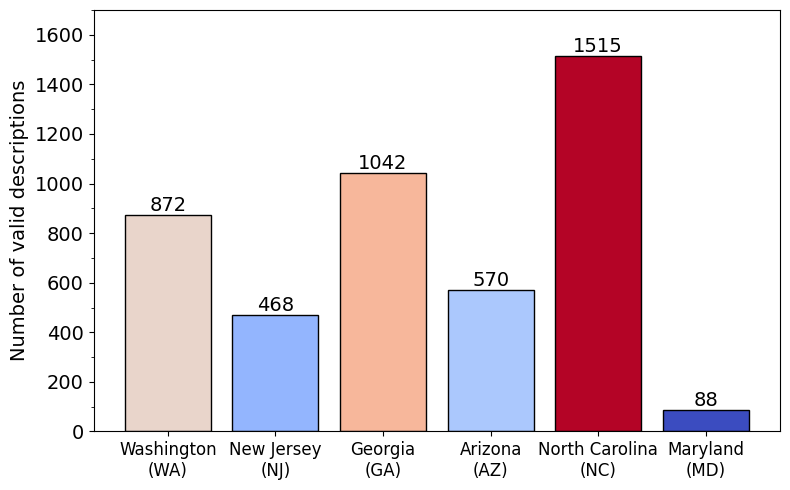

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Sample data
categories = ['Washington\n(WA)', 'New Jersey\n(NJ)', 'Georgia\n(GA)', 'Arizona\n(AZ)','North Carolina\n(NC)','Maryland\n(MD)']
values = [len(i) for i in df_all_states]
colors = cm.coolwarm((np.array(values) - min(values)) / (max(values) - min(values)))


# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=14)

# Add labels and title
plt.ylabel('Number of valid descriptions', fontsize=14) 
plt.ylim(0, 1700)
# Customize x-ticks
plt.xticks(rotation=0, fontsize=12, ha='center')  # Rotate x-ticks for better readability
plt.yticks(fontsize=14) 
# Add minor ticks
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks at intervals of 0.5 units
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))


# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

### Preprocess Descriptions and extract embeddings

In [18]:
# import bert_classification as bert
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [19]:
# Set up the device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

### Extract embeddings (if haven't done before)

In [20]:
# Preprocess data by converting text to lowercase, removing non-word characters and numbers, 
# excluding the specific word 'wsba', exclude single characters, tokenizing, removing stopwords, and applying lemmatization or stemming if method = "stemming"

preprocessor = uti.TextPreprocessor(method='lemmatization')
preprocessed_descriptions = df_all_states['Description'].apply(preprocessor.preprocess)



import math

states = ["WA", "NJ", "GA", "AZ", "NC", "MD"]
batch_size = 128*3
preprocessed_descriptions_all_states = []
embeddings = []
preprocessor = uti.TextPreprocessor(method='lemmatization')
for j, df in enumerate(df_all_states):
    preprocessed_description = df['Description'].apply(preprocessor.preprocess)
    full_out=np.zeros((len(preprocessed_description.to_list()), 768))#data count, embedding size
    for i in range(math.ceil(len(preprocessed_description.to_list())/batch_size)):
        data=tokenizer(preprocessed_description.to_list()[i*batch_size:(i+1)*batch_size],padding='max_length',truncation=True,max_length=256,return_tensors="pt")
        #print(data)
        with torch.no_grad():
            out=model(**data)
        full_out[i*batch_size:(i+1)*batch_size]=out.last_hidden_state.mean(dim=1)
        del data
        del out
    np.save("./embeddings/" + states[j]+"_embedding.npy", full_out)
    embeddings.append(full_out)
    preprocessed_descriptions_all_states.append(preprocessed_description)

### Load embeddings if already done

In [21]:
# embeddings = []
# preprocessor = uti.TextPreprocessor(method='lemmatization')
# states = ["WA", "NJ", "GA", "AZ", "NC", "MD"]
# preprocessed_descriptions_all_states = []
# for j, df in enumerate(df_all_states):
#     embeddings.append(np.load("./embeddings/" + states[j]+"_embedding.npy"))
#     preprocessed_description = df['Description'].apply(preprocessor.preprocess)
#     preprocessed_descriptions_all_states.append(preprocessed_description)

FileNotFoundError: [Errno 2] No such file or directory: './embeddings/WA_embedding.npy'

### Classification using BERT

In [ ]:
import embeddings_bert as bert
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from sklearn.metrics import accuracy_score


In [ ]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 128
learning_rate = 1e-4

class Net(nn.Module):
    """
    The model class, which defines our classifier.
    """
    def __init__(self):
        """
        The constructor of the model.
        """
        super().__init__()
        self.fc1 = nn.Linear(768, 384)
        self.fc1_bn = nn.BatchNorm1d(384)
        self.fc1_drop = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(384, 192)
        self.fc2_bn = nn.BatchNorm1d(192)
        self.fc2_drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(192, 2)

    def forward(self, x):
        """
        The forward pass of the model.

        input: x: torch.Tensor, the input to the model

        output: x: torch.Tensor, the output of the model
        """
        x = nn.functional.relu(self.fc1_bn(self.fc1(x)))
        x = self.fc1_drop(x)
        x = nn.functional.relu(self.fc2_bn(self.fc2(x)))
        x = self.fc2_drop(x)
        x = self.fc3(x)
        return x

In [ ]:
import matplotlib.pyplot as plt
from pytorchtools import EarlyStopping


In [ ]:
n_epochs = 500
learning_rate = 1e-7
patience = 20


scores = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
freq_label = np.zeros([len(preprocessed_descriptions_all_states), len(unique_bins)])
for i, embedding in enumerate(embeddings):
    # if i == 1:
    #     break
    # define testing set 
    df_test = df_all_states[i]
    # combine the rest of states into signle dataframe
    df_train = pd.concat([x for ii,x in enumerate(df_all_states) if ii!=i] , axis=0, ignore_index=True)
    # combine the rest of descriptions into single set
    x_train = np.concatenate([x for ii,x in enumerate(embeddings) if ii!=i])

    for j, label in enumerate(unique_bins):
        # if j == 1:
        #     break
        # index with(out) label for test data
        mask_test = df_test[conduct_cols].isin([label])
        test_with_label = df_test[mask_test].dropna(how='all').index.values.tolist()
        test_without_label = np.setdiff1d(np.array(df_test.index),np.array(test_with_label))
 
        # index with(out) label for train data
        mask_train = df_train[conduct_cols].isin([label])
        train_with_label = df_train[mask_train].dropna(how='all').index.values.tolist()
        train_without_label = np.setdiff1d(np.array(df_train.index),np.array(train_with_label))

        # frequency of label in TESTING set 
        freq_label[i, j] = len(test_with_label)/(len(test_with_label) + len(test_without_label))

        y_test = pd.DataFrame(np.append(np.ones(len(test_with_label)), np.zeros(len(test_without_label))),index = np.append(test_with_label, test_without_label))
        y_train = pd.DataFrame(np.append(np.ones(len(train_with_label)), np.zeros(len(train_without_label))),index = np.append(train_with_label, train_without_label))
        
        # print(embedding.shape, y_test.shape)
        train_dataset = TensorDataset(torch.from_numpy(x_train).type(torch.float),
                                torch.from_numpy(y_train.to_numpy()).type(torch.float))
        test_dataset = TensorDataset(torch.from_numpy(embedding).type(torch.float),
                                        torch.from_numpy(y_test.to_numpy()).type(torch.float))
        train_loader = DataLoader(dataset=train_dataset,
                                batch_size=1024,
                                shuffle=True,
                                pin_memory=True, num_workers=8)
        test_loader = DataLoader(dataset=test_dataset,
                                batch_size=1024,
                                shuffle=False,
                                pin_memory=True, num_workers=8)
        # del x_train



        model = Net() 

        # criterion = nn.BCEWithLogitsLoss()
        # criterion_val = nn.BCEWithLogitsLoss()

        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

        training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2048*2)
        validation_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2048)

    
        # Training the model
        val_accuraces = []
        train_losses = []
        val_losses = []

        early_stopping = EarlyStopping(patience=patience, verbose=False)
        for k, epoch in enumerate(range(n_epochs)):
            # print(f"Epoch: {epoch + 1}/{n_epochs}")
            model.train()
            train_loss = []
            val_loss = []
            val_accuracy = []
            for [X, y] in training_loader:
                # zero the parameter gradients
                #print(len(X))
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = model(X)
                y = y.type(torch.LongTensor)
                loss = nn.CrossEntropyLoss()(outputs, y.squeeze(1))
                train_loss.append(loss.item())
                loss.backward()
                optimizer.step()
            
            model.eval() 
            with torch.no_grad():
                valid_loss = 0.0
                for [X, y] in validation_loader:
                    # forward 
                    # print(X.shape, y.shape)
                    outputs = model(X)
                    _, preds = torch.max(outputs, dim=1)
                    y = y.type(torch.LongTensor)
                    loss = nn.CrossEntropyLoss()(outputs, y.squeeze(1))
                    val_loss.append(loss.item())
                    accuracy = accuracy_score(y, preds)
                    val_accuracy.append(accuracy)
            val_accuraces.append(np.average(val_accuracy))
            if val_accuracy[-1] >= 0.7:
                learning_rate = 1e-7
                optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

            train_losses.append(np.average(train_loss))
            val_losses.append(np.average(val_loss))
            early_stopping(val_losses[-1], model)
            
            if early_stopping.early_stop:
                print("Early stopping: ", k)
                break
        print(f"Accuracy: {val_accuracy[-1]}",f"Test: {val_losses[-1]}", f"Train: {train_losses[-1]}")
        # plt.figure()
        # plt.plot(val_losses, label="test loss")
        # plt.plot(train_losses, label="train loss")
        # plt.legend()
        # plt.show()
        scores[i, j] = val_accuracy[-1]



Early stopping:  36
Accuracy: 0.5905963302752294 Test: 0.6874750852584839 Train: 0.8095752596855164
Early stopping:  20
Accuracy: 0.6605504587155964 Test: 0.6807281970977783 Train: 0.6500020027160645
Early stopping:  20
Accuracy: 0.48623853211009177 Test: 0.7009890079498291 Train: 0.7496867775917053
Early stopping:  20
Accuracy: 0.15711009174311927 Test: 0.8777809739112854 Train: 1.0120660066604614
Early stopping:  20
Accuracy: 0.5837155963302753 Test: 0.6859515309333801 Train: 0.7946948409080505
Early stopping:  22
Accuracy: 0.2408256880733945 Test: 0.7454760670661926 Train: 0.832385241985321
Early stopping:  43
Accuracy: 0.6628440366972477 Test: 0.6615338325500488 Train: 0.7238438725471497
Early stopping:  20
Accuracy: 0.2029816513761468 Test: 0.7613047957420349 Train: 0.6258351802825928
Early stopping:  20
Accuracy: 0.31995412844036697 Test: 0.7179020643234253 Train: 1.0673179626464844
Early stopping:  25
Accuracy: 0.5137614678899083 Test: 0.7143720388412476 Train: 0.780218005180358

In [ ]:
scores

array([[0.68233945, 0.52408257, 0.70183486, 0.44495413, 0.29472477,
        0.08486239],
       [0.49145299, 0.6474359 , 0.47435897, 0.57051282, 0.19017094,
        0.65384615],
       [0.43570058, 0.4059501 , 0.15930902, 0.45201536, 0.01919386,
        0.91650672],
       [0.48421053, 0.51052632, 0.59298246, 0.48245614, 0.08421053,
        0.71578947],
       [0.51155116, 0.48778878, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

### Accuracy estimation of the log regression model

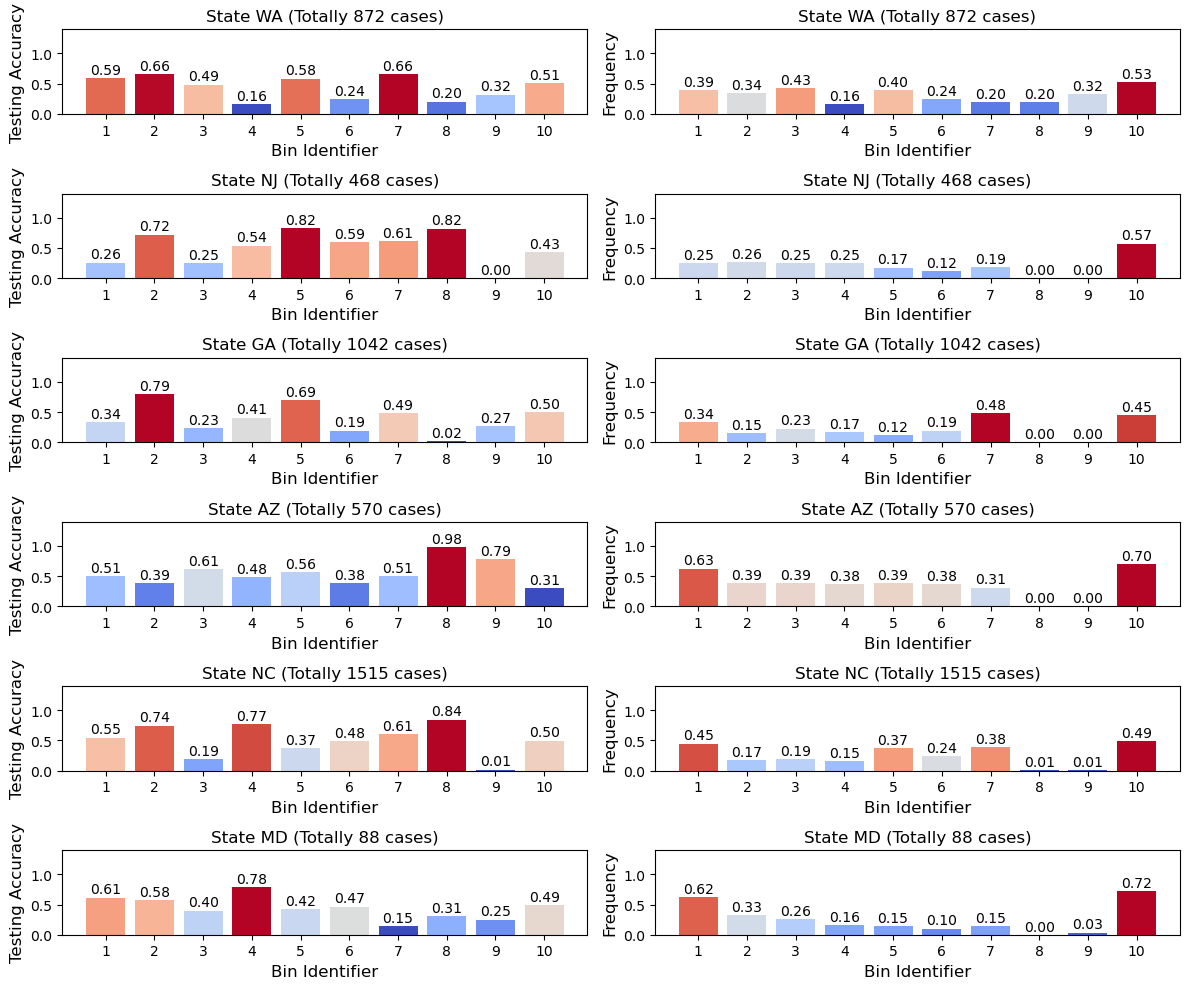

In [ ]:
# Create a new figure with two subplots (side by side) including the exact frequency labels on top
import matplotlib.pyplot as plt

import matplotlib.cm as cm



fig, ax = plt.subplots(len(df_all_states), 2, figsize=(12, 10))

for i,_ in enumerate(df_all_states):
    score = scores[i, :]
    colors = cm.coolwarm((score - min(score)) / (max(score) - min(score)))

    # Plot the original histogram with gradient colors (first subplot)
    ax[i,0].bar(unique_bins, score, color=colors, width=0.8, align='center')
    ax[i,0].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,0].set_ylabel("Testing Accuracy", fontsize=12)
    ax[i,0].set_ylim(0, 1.4)
    ax[i,0].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    ax[i,0].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")
    # Display the exact height above each bar
    for j, value in enumerate(score):
        ax[i,0].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Plot the new histogram with frequency (second subplot)
    colors = cm.coolwarm((freq_label[i, :] - min(freq_label[i, :])) / (max(freq_label[i, :]) - min(freq_label[i, :])))
    ax[i,1].bar(unique_bins, freq_label[i, :], color=colors, width=0.8, align='center')
    ax[i,1].set_xlabel("Bin Identifier", fontsize=12)
    ax[i,1].set_ylabel("Frequency", fontsize=12)
    ax[i,1].set_ylim(0, 1.4)
    ax[i,1].set_xticks(np.linspace(unique_bins[0],unique_bins[-1],len(unique_bins)))
    ax[i,1].set_title("State " + states[i] + " (Totally " + str(len(df_all_states[i]))+ " cases)")

    
    # Display the exact frequency above each bar
    for j, value in enumerate(freq_label[i, :]):
        ax[i,1].text(unique_bins[j], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Display the plot with both subplots

    plt.tight_layout()
plt.show()  # Show the complete plot with two subplots, with exact frequencies

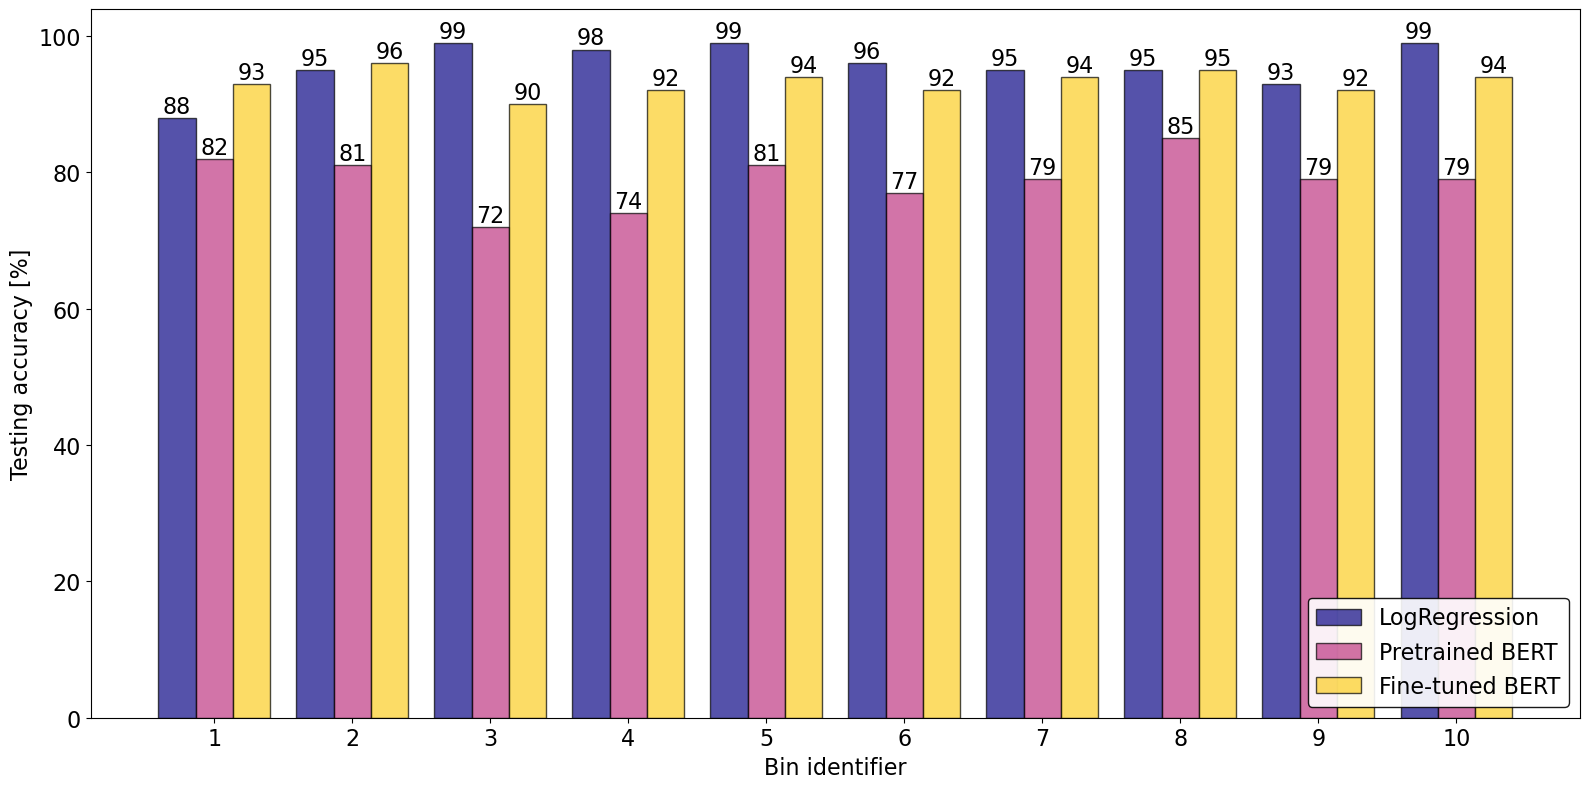

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Sample data
categories = unique_bins
series1 = np.array([0.88, 0.95, 0.99, 0.98, 0.99, 0.96, 0.95, 0.95, 0.93, 0.99])*100
series2 = np.array([0.82, 0.81, 0.72, 0.74, 0.81, 0.77, 0.79, 0.85, 0.79, 0.79])*100
series3 = np.array([0.93, 0.96, 0.90, 0.92, 0.94, 0.92, 0.94, 0.95, 0.92, 0.94])*100

# Bar width
bar_width = 0.27

# Position of bars on x-axis
x = np.arange(len(categories))
fontsize=16
# Create a common colormap

colormap = cm.plasma(np.linspace(0, 0.9, 3))  # Create a colormap with 3 colors
colors = [colormap[0], colormap[1], colormap[2]] 

colors1 = colormap[0]  # Blue for Series 1
colors2 = colormap[1]  # Green for Series 2
colors3 = colormap[2]  # Red for Series 3
plt.figure(figsize=(16,8))
# Creating the bar plot with solid colors
for i in range(len(series1)):
    plt.bar(x[i], series1[i], width=bar_width, color=colors1, label="LogRegression" if i == 0 else "", alpha=0.7,  edgecolor='black')
    plt.text(x[i], series1[i] + 0.02, f"{series1[i]:.0f}", ha='center', va='bottom', fontsize=fontsize)

for i in range(len(series2)):
    plt.bar(x[i] + bar_width, series2[i], width=bar_width, color=colors2, label="Pretrained BERT" if i == 0 else "", alpha=0.7,  edgecolor='black')
    plt.text(x[i] + bar_width, series2[i] + 0.02, f"{series2[i]:.0f}", ha='center', va='bottom', fontsize=fontsize)

for i in range(len(series3)):
    plt.bar(x[i] + 2 * bar_width, series3[i], width=bar_width, color=colors3, label="Fine-tuned BERT" if i == 0 else "", alpha=0.7,  edgecolor='black')
    plt.text(x[i] + 2 * bar_width, series3[i] + 0.02, f"{series3[i]:.0f}", ha='center', va='bottom', fontsize=fontsize)

# Adding labels and title
plt.xlabel('Bin identifier', fontsize=fontsize)
plt.ylabel('Testing accuracy [%]', fontsize=fontsize)

plt.xticks(x + bar_width, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc='lower right', edgecolor='black', facecolor='white', framealpha=0.9)

# Display the plot
plt.tight_layout()
plt.show()


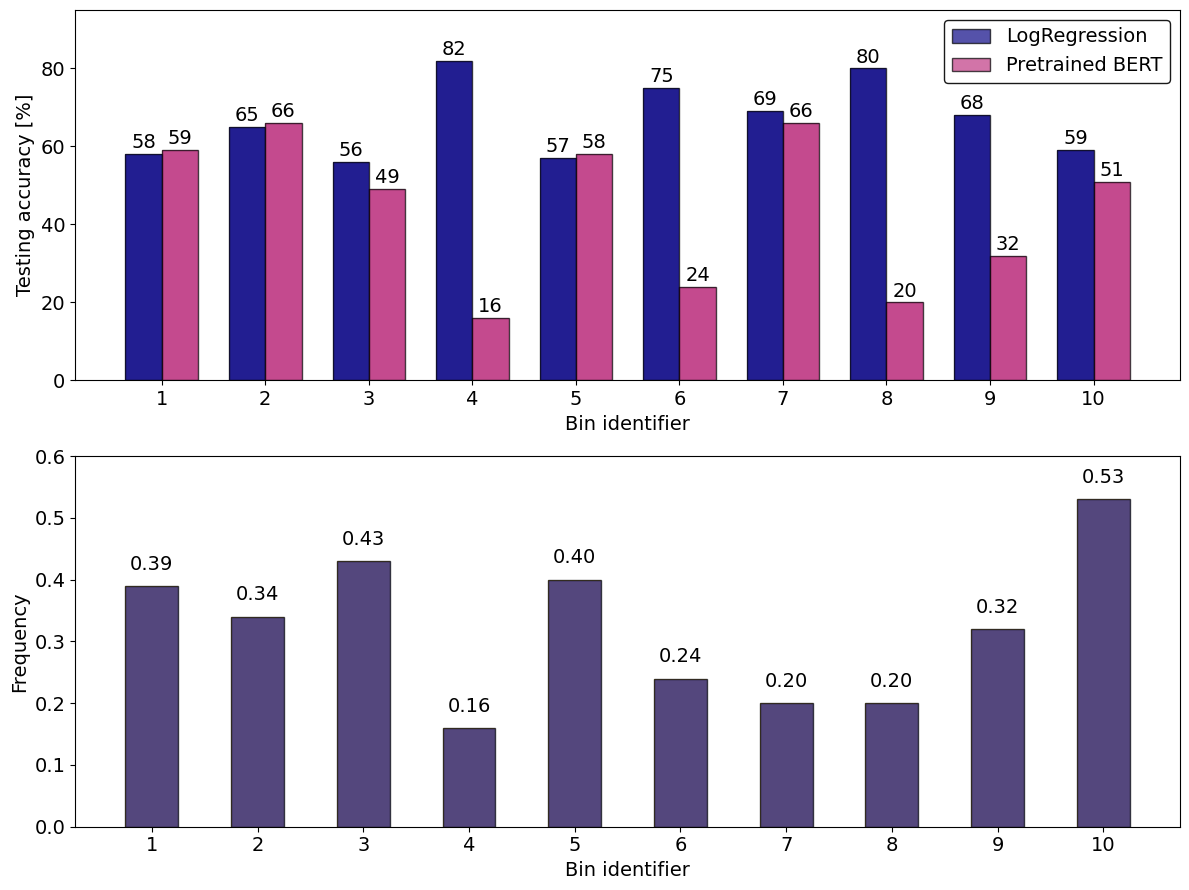

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = unique_bins
series1 = np.array([0.58, 0.65, 0.56, 0.82, 0.57, 0.75, 0.69, 0.8, 0.68, 0.59])*100
series2 = np.array([0.59, 0.66, 0.49, 0.16, 0.58, 0.24, 0.66, 0.20, 0.32, 0.51])*100
series4 = np.array([0.39, 0.34, 0.43, 0.16, 0.4, 0.24, 0.20, 0.20, 0.32, 0.53])
series3 =  np.array([0.39, 0.34, 0.43, 0.16, 0.4, 0.24, 0.20, 0.20, 0.32, 0.53])

# Bar width
bar_width = 0.35

# Position of bars on x-axis
x = np.arange(len(categories))
fontsize=14
colormap = cm.plasma(np.linspace(0, 0.9, 3))  # Create a colormap with 3 colors
colors = [colormap[0], colormap[1], colormap[2]] 

colors1 = colormap[0]  # Blue for Series 1
colors2 = colormap[1]  # Green for Series 2
colors3 = colormap[2] 

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12,9))  # 2 rows, 1 column
bars1 = axs[0].bar(x - bar_width / 2, series1, width=bar_width, color=colors1, alpha=0.7)
bars2 = axs[0].bar(x + bar_width / 2, series2, width=bar_width, color=colors2, alpha=0.7)



# First subplot: Series 1 vs Series 2
axs[0].bar(x - bar_width / 2, series1, width=bar_width, color=colors1, label="LogRegression", alpha=0.7, edgecolor='black')
axs[0].bar(x + bar_width / 2, series2, width=bar_width, color=colors2, label="Pretrained BERT", alpha=0.7,  edgecolor='black')
axs[0].set_xticks(x)
axs[0].set_ylim([0, 95])
axs[0].set_xticklabels(categories)
axs[0].set_ylabel('Testing accuracy [%]', fontsize=fontsize)
axs[0].set_xlabel('Bin identifier', fontsize=fontsize)
axs[0].legend(fontsize=fontsize, loc='upper right', edgecolor='black', facecolor='white', framealpha=0.9)
axs[0].set_xticklabels(categories, fontsize=fontsize)
axs[0].tick_params(axis='y', labelsize=fontsize) 

for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval:.0f}", ha='center', va='bottom', fontsize=fontsize)


for bar in bars2:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval:.0f}", ha='center', va='bottom', fontsize=fontsize)

bar_width = 0.5
bars3 = axs[1].bar(x , series3, width=bar_width, color=colors3, alpha=0.7)
# Second subplot: Series 3 vs Series 4
axs[1].bar(x, series3, width=bar_width, color=colors1, alpha=0.7,  edgecolor='black')
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories)
axs[1].set_ylabel('Frequency', fontsize=fontsize)
axs[1].set_xlabel('Bin identifier', fontsize=fontsize)
axs[1].set_ylim([0, 0.6])
axs[1].set_xticklabels(categories, fontsize=fontsize)
axs[1].tick_params(axis='y', labelsize=fontsize) 
for bar in bars3:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=fontsize)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
np.mean(series2)

44.1